Consider the image shown 
(a) Apply gamma correction to the L plane in the L∗a∗b∗
color space and state the γ value.



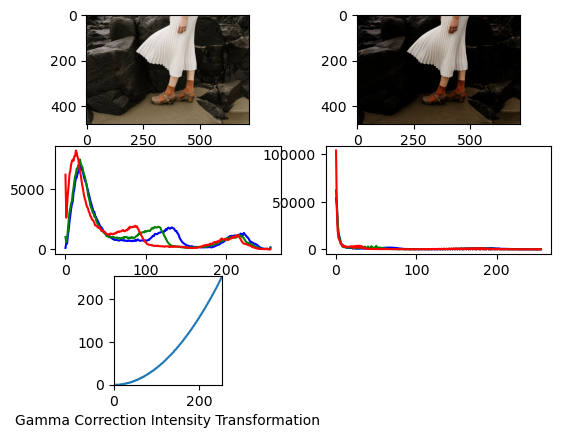

In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('images\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# Apply gamma correction
gamma = 2
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

# Convert images to RGB format
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

# Create subplots
f, axarr = plt.subplots(3, 2)

# Display the original and gamma corrected images
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)

# Plot histograms
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

# Plot the gamma correction table
axarr[2, 0].plot(table)
axarr[2,0].set_xlabel("Gamma Correction Intensity Transformation")
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

axarr[2, 1].axis('off')

# Show the plots
plt.show()


(b) Show the histograms of the original and corrected images.

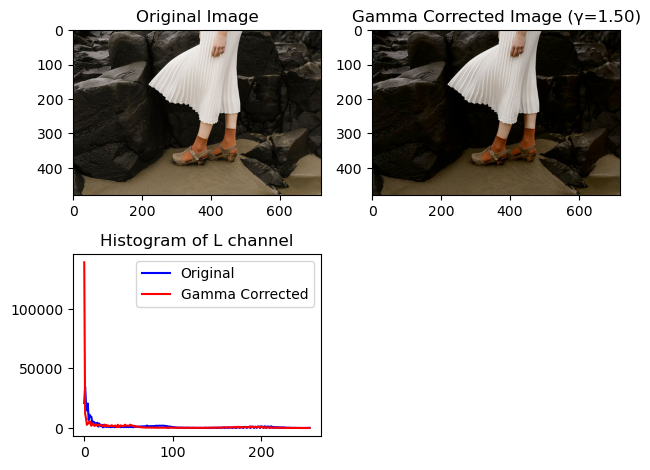

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('images\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# Convert the image to LAB color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)

# Apply gamma correction to the L channel
gamma = 1.5  # You can adjust this gamma value
img_lab[:,:,0] = np.power(img_lab[:,:,0] / 255.0, gamma) * 255.0

# Convert the image back to BGR color space
img_gamma = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)

# Create subplots
f, axarr = plt.subplots(2, 2)

# Display the original and gamma corrected images
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 0].set_title("Original Image")
axarr[0, 1].imshow(cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB))
axarr[0, 1].set_title("Gamma Corrected Image (γ={:.2f})".format(gamma))

# Plot histograms for the L channel
hist_orig = cv.calcHist([img_lab], [0], None, [256], [0, 256])
hist_gamma = cv.calcHist([img_gamma], [0], None, [256], [0, 256])
axarr[1, 0].plot(hist_orig, color='b', label='Original')
axarr[1, 0].plot(hist_gamma, color='r', label='Gamma Corrected')
axarr[1, 0].set_title("Histogram of L channel")
axarr[1, 0].legend()

# Hide the empty subplot
axarr[1, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()
